In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time

import numpy as np
import moyra as ma

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import FwtModels as mf
me.mechanics_printing()

In [2]:
test_num = 6

b_modes = 3
t_modes = 2
kink_b_modes = 1
kink_t_modes = 1
fwt_modes = 1
modes = b_modes + t_modes + kink_t_modes + kink_b_modes + fwt_modes
main_inner_panels = 12
main_outer_panels = 8
main_panels = main_inner_panels + main_outer_panels
fwt_panels = 15
tab_panels = 10
panels = main_panels + fwt_panels

p = ma.DynamicModelParameters(modes)

## Create some global parameters
p.b_modes = ma.ModelSymbol(value = b_modes,string = 'b_modes') # percentage of wing that is a FWT
p.t_modes = ma.ModelSymbol(value = t_modes,string = 't_modes') # percentage of wing that is a FWT
p.kink_b_modes = ma.ModelSymbol(value = kink_b_modes,string = 'kink_b_modes') # percentage of wing that is a FWT
p.kink_t_modes = ma.ModelSymbol(value = kink_t_modes,string = 'kink_t_modes') # percentage of wing that is a FWT
p.modes = ma.ModelSymbol(value = modes,string = 'modes') # percentage of wing that is a FWT

p.c = ma.ModelSymbol(value = 0.15,string = 'c') # chord of wing
p.s_i = ma.ModelSymbol(value = 1,string = 's_i') # total semi-span of wing
p.s_f = ma.ModelSymbol(value = 0.345,string = 's_f') # total semi-span of wingtip
p.s_t = ma.ModelSymbol(value = 0.1,string = 's_t') # total length of the tab
p.alpha_r = ma.ModelSymbol(value = np.deg2rad(3),string = 'alpha_r') # root AoA

## inner beam section
p.s_1 = ma.ModelSymbol(value = 0.8,string = 's_1') # total length of the tab
p.c_b = ma.ModelSymbol(value = 0.03,string = 'c_b') # chord of beam
p.rho_b = ma.ModelSymbol(value = 19.53,string = 'rho_b') # beam mass per unit area (kg/m^2)

## outer beam section
p.c_b2 = ma.ModelSymbol(value = 0.02,string = 'c_b2') # chord of beam
p.rho_b2 = ma.ModelSymbol(value = 19.53,string = 'rho_b2') # beam mass per unit area (kg/m^2)
p.EI = ma.ModelSymbol(value = 9.77e6,string = 'EI') # Bending stiffness for the wing
p.GJ = ma.ModelSymbol(value = 0.99e6,string = 'GJ') # Torsional Stiffness for the wing

p.K_hinge = ma.ModelSymbol(value = 0,string = 'K_hinge')    # Unsteady Torsional Term

## wing uniform mass
p.rho_w = ma.ModelSymbol(value = 19.53,string = 'rho_w') # wing mass per unit area (kg/m^2)
p.c_w = ma.ModelSymbol(value = 0.15,string = 'c_w') # chord over which to integrate wing mass
p.EI_2 = ma.ModelSymbol(value = 9.77e6,string = 'EI_2') # Bending stiffness for the wing
p.GJ_2 = ma.ModelSymbol(value = 0.99e6,string = 'GJ_2') # Torsional Stiffness for the wing


# Location of flexural axes fro beam
p.e_0 = ma.ModelSymbol(value = 0.08,string = 'e_0')
p.x_f0 = ma.ModelSymbol(value = 0.08,string = 'x_f')

# FWT mass element
p.m_f = ma.ModelSymbol(value = 0.3,string = 'm_f')
p.x_comf = ma.ModelSymbol(value = 0.3,string = 'x_comf')
p.y_comf = ma.ModelSymbol(value = 0.3,string = 'y_comf')
p.I_xxf = ma.ModelSymbol(value = 0.3,string = 'I_xxf') # inertia of FWT (uniform bar)
p.I_yyf = ma.ModelSymbol(value = 0.3,string = 'I_yyf') # inertia of FWT (uniform bar)

# FWT properties
p.Lambda = ma.ModelSymbol(value = np.deg2rad(10),string = 'Lambda') # Flare Angle
p.mu = ma.ModelSymbol(value = 0,string = 'mu')                 # dihedral angle at the end of the inner wing
p.mu_d = ma.ModelSymbol(value = 0,string = 'mu_d') # rate of change of dihedral angle at the tip of the inner wing

# Symbols to translate along inner wing and FWT
p.y_0 =ma.ModelSymbol(value = 0,string = 'y_0')        # inner wing y chord
p.x_0 = ma.ModelSymbol(value = 0,string = 'x_0')       # inner wing x chord
p.y_1 = ma.ModelSymbol(value = 0,string = 'y_1')       # FWT y chord
p.x_1 = ma.ModelSymbol(value = 0,string = 'x_1')       # FWT x chord

# Unsteady Aero Terms
p.k = ma.ModelSymbol(value = 0,string = 'k')    # reduced frequency
p.AR = ma.ModelSymbol(value = 0,string = 'AR')    # Aspect Ratio
p.M_thetadot = ma.ModelSymbol(value = -1.2,string = 'M_thetadot')    # Unsteady Torsional Term


## Aero Parameters
p.rho = ma.ModelSymbol(value = 1.225,string = 'rho')                 # density
p.V = ma.ModelSymbol(value = 10,string = 'V')                        # velocity
p.c_dmax = ma.ModelSymbol(value = 0.01,string = 'c_dmax')             # c_dmax
p.x_l = ma.ModelSymbol(value = 0.25,string = 'x_l')    # location of lift as percentage of the chord

# C_L curve terms
p.alpha_max = ma.ModelSymbol(value = np.deg2rad(15),string = 'alpha_max')# peak AoA
p.clip_factor = ma.ModelSymbol(value = 0.1,string = 'clip_factor')    # clipping factor for stall
p.stall_factor = ma.ModelSymbol(value = 0.1,string = 'stall_factor')    # clipping factor for stall
p.stall_rate = ma.ModelSymbol(value = np.deg2rad(0.5),string = 'stall_rate')    # clipping factor for stall
p.a_i = ma.ModelSymbol(value = 2*np.pi,string = 'a_i')               # C_L slope of main wing
p.a_0i = ma.ModelSymbol(value = 2*np.pi,string = 'a_0i')               # C_L slope of main wing
p.a = ma.ModelMatrix(value =[np.pi*2]*panels,length=panels, string='a') # local C_l

# gravity terms
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v')      # gravity unit vector


## FWT tab Wing Specific
p.beta_t = ma.ModelSymbol(value = 0,string = 'beta_t')               # tab
p.beta_m = ma.ModelSymbol(value = 0,string = 'beta_m')               # tab
p.beta_a = ma.ModelSymbol(value = 0,string = 'beta_a')               # tab

## FWT Aero Specific
p.alpha_1 = ma.ModelSymbol(value = 0,string = 'alpha_1')             # FWT alpha
p.alphadot_1 = ma.ModelSymbol(value = 0,string = 'alphadot_1')       # FWT alphadot

## Numeric Model Constants
p.fp = ma.ModelMatrix(value =[0]*p.qs*2,length=p.qs*2,string='fp') # The stationary point

# Factor to change the size of joint values
p.eta = ma.ModelMatrix(value = [1]*modes,length=modes,string='eta')

In [3]:
#get shape functions for main wing
q_0 = p.q[:b_modes+t_modes]
q_1 = p.q[b_modes+t_modes:modes-fwt_modes]
S_0,tau_0 = ma.elements.FlexiElement.ShapeFunctions_OBM_IBN_TO(b_modes,0,t_modes,q_0,p.y_0,p.x_0,0,1,type='taylor')
S_1,tau_1 = ma.elements.FlexiElement.ShapeFunctions_OBM_IBN_TO(kink_b_modes,0,kink_t_modes,q_1,p.y_0-p.s_1,p.x_0,0,1,type='taylor')
u_0 = S_0*sym.Matrix(q_0) + sym.Matrix([p.x_0,p.y_0,0])
u_1 = u_0 + S_1*sym.Matrix(q_1)

In [4]:
# apply weighting function
#define wrefernce frames
# wing_root_frame = ma.HomogenousTransform().R_y(p.alpha_r)
wing_root_frame = ma.frames.HomogenousFrame()

# get flexible element
wing_frame_inner = wing_root_frame.Translate(*u_0)
wing_flexural_frame_inner = wing_root_frame.Translate(0,u_0[1],u_0[2].subs({p.x_0:0}))


wing_frame_outer = wing_root_frame.Translate(*u_1)
wing_flexural_frame_outer = wing_root_frame.Translate(0,u_1[1],u_1[2].subs({p.x_0:0}))

tip_twist = (tau_0 + tau_1).subs({p.y_0:(p.s_i)})
hinge_frame =  wing_flexural_frame_outer.subs({p.y_0:p.s_i})
fwt_root_frame = hinge_frame.R_y(tip_twist).R_x(p.q[-1])
fwt_frame = fwt_root_frame.Translate(p.x_1-p.x_f0,p.y_1,0)

x_aero = p.c*p.x_l - p.x_f0
y_aero = (p.y_1+x_aero*sym.tan(p.Lambda))*sym.cos(p.Lambda)
fwt_aero_frame =  hinge_frame.R_x(p.q[-1]).Translate(x_aero,y_aero,0)

In [5]:
#Create Elemnts
M_fwt = ma.elements.MassMatrix(p.m_f,I_xx = p.I_xxf,I_yy = p.I_yyf)

## inner beam element
beam_x_int = (p.x_0,-p.c_b/2,p.c_b/2)
beam_y_int = (p.y_0,0,p.s_1)
beam_mass_ele = ma.elements.FlexiElement(p.q,wing_frame_inner,p.rho_b,S_0,beam_x_int,beam_y_int,0,q_0,p.EI,p.GJ,grav_vec = p.g*p.g_v,simplify = False)

## outer beam element
beam2_x_int = (p.x_0,-p.c_b2/2,p.c_b2/2)
beam2_y_int = (p.y_0,p.s_1,p.s_i)
beam2_mass_ele = ma.elements.FlexiElement(p.q,wing_frame_outer,p.rho_b2,S_1,beam2_x_int,beam2_y_int,0,q_1,p.EI_2,p.GJ_2,grav_vec = p.g*p.g_v,simplify = False)

## wing mass element inner
wing_x_int = (p.x_0,-p.x_f0,p.c_w-p.x_f0)
wing_y_int = (p.y_0,0,p.s_1)
wing_mass_ele_inner = ma.elements.FlexiElement(p.q,wing_frame_inner,p.rho_w,S_0,wing_x_int,wing_y_int,0,q_0,0,0,grav_vec = p.g*p.g_v,simplify = False)

## wing mass element outer
wing_x_int = (p.x_0,-p.x_f0,p.c_w-p.x_f0)
wing_y_int = (p.y_0,p.s_1,p.s_i)
wing_mass_ele_outer = ma.elements.FlexiElement(p.q,wing_frame_outer,p.rho_w,S_1,wing_x_int,wing_y_int,0,q_1,0,0,grav_vec = p.g*p.g_v,simplify = False)

## FWT mass element
x_com = (p.x_comf-p.x_f0)
y_com = (p.y_comf + x_com*sym.tan(p.Lambda))*sym.cos(p.Lambda)
fwt_ele = ma.elements.RigidElement(p.q,fwt_root_frame,M_fwt, grav_vec=p.g*p.g_v, com_pos=[x_com,y_com,0],simplify = False)

## Hinge Spring Element
hinge_spring = ma.elements.Spring(p.q,p.q[-1],p.K_hinge)

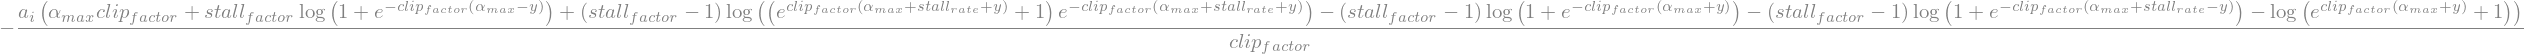

In [6]:
from sympy.abc import y
def ramp(x,corner,sharpness):
    return 1/sharpness*sym.ln(1+sym.exp(sharpness*(x+corner)))

def make_cl(x,stall_angle,stall_factor,c_l_0,sharpness):
    c_l = ramp(x,stall_angle,sharpness)
    c_l -= ramp(x,-stall_angle,sharpness)*stall_factor
    c_l += ramp(x,-(stall_angle+p.stall_rate),sharpness)*(stall_factor-1)
    c_l += ramp(-x,-(stall_angle),sharpness)*(stall_factor-1)
    c_l -= ramp(-x,-(stall_angle+p.stall_rate),sharpness)*(stall_factor-1)
    c_l -= stall_angle
    c_l *= c_l_0
    return c_l

c_l_func = lambda x: make_cl(x,p.alpha_max,p.stall_factor,p.a_i,p.clip_factor)
sym.simplify(make_cl(y,p.alpha_max,p.stall_factor,p.a_i,p.clip_factor))

In [7]:
# Main Inner Wing Aero Forces 
wing_AeroForces = ma.forces.AeroForce.PerUnitSpan(p,wing_flexural_frame_inner,p.a_i,
                               alphadot = 0 if isinstance(tau_0,int) else tau_0.diff(me.dynamicsymbols._t),
                               M_thetadot = p.M_thetadot,
                               e = p.e_0,
                               w_g = 0,
                               root_alpha = p.alpha_r,
                                delta_alpha = tau_0,
                               alpha_zero = 0,
                               stall_angle = p.alpha_max,
                               c = p.c,
                                V = p.V,
                               c_d_max = p.c_dmax,
                               linear = True,
                                z_inverted=False,
                               unsteady=True,
                               c_l_func = lambda x: c_l_func(x))

# split Main Wing into segments
forces = []
for i in range(main_inner_panels):
    seg_width = p.s_1/main_inner_panels
    yi = seg_width/2 + i*seg_width
    forces.append(wing_AeroForces.subs({p.y_0:yi,p.a_i:p.a[i]})*seg_width)
    
Q = sym.Matrix([0]*p.qs)
for f in forces:
    Q += f.Q()

In [8]:
# Main Outer Wing Aero Forces
tau = tau_0+tau_1
wing_AeroForces = ma.forces.AeroForce.PerUnitSpan(p,wing_flexural_frame_outer,p.a_i,
                               alphadot = 0 if isinstance(tau,int) else tau.diff(me.dynamicsymbols._t),
                               M_thetadot = p.M_thetadot,
                               e = p.e_0,
                               w_g = 0,
                               root_alpha = p.alpha_r,
                                delta_alpha = tau,
                               alpha_zero = 0,
                               stall_angle = p.alpha_max,
                               c = p.c,
                                V = p.V,
                               c_d_max = p.c_dmax,
                               linear = True,
                                z_inverted=False,
                               unsteady=True,
                               c_l_func = lambda x: c_l_func(x))

# split Main Wing into segments
forces = []
for i in range(main_outer_panels):
    seg_width = (p.s_i-p.s_1)/main_outer_panels
    yi = p.s_1 + seg_width/2 + i*seg_width
    forces.append(wing_AeroForces.subs({p.y_0:yi,p.a_i:p.a[i]})*seg_width)
    
for f in forces:
    Q += f.Q()
wing_AeroForces = ma.forces.ExternalForce(Q)

In [9]:
# BodyJacobian = sym.simplify(ef.AeroForce._trigsimp(fwt_aero_frame.BodyJacobian(p.q)))
BodyJacobian = fwt_aero_frame.BodyJacobian(p.q)
C_L = p.a_i
alphadot = p.alphadot_1
M_thetadot = p.M_thetadot
e = 0
w_g = 0
root_alpha = p.alpha_1
delta_alpha = 0
alpha_zero = 0
stall_angle = p.alpha_max
c = p.c
V = p.V
c_d_max = p.c_dmax
linear = True
z_inverted=False
unsteady=True,
fwt_c_l_func = lambda x: c_l_func(x)+p.beta_t*p.beta_a*p.a_i
# fwt_c_l_func = lambda x: p.a_i*x+p.beta_t*p.beta_a*p.a_i
fwt_c_m_func = lambda x: p.beta_t*p.beta_m*p.a_i

dAlpha = ma.forces.AeroForce.get_dAlpha(p,BodyJacobian,alphadot,alpha_zero, root_alpha, delta_alpha, w_g,V,c,z_inverted,unsteady)
F_n = ma.forces.AeroForce.get_F_n(p,BodyJacobian,dAlpha,C_L,alpha_zero, stall_angle,c_d_max,V,c,linear,fwt_c_l_func)
M_w = ma.forces.AeroForce.get_moment(p,BodyJacobian,dAlpha,F_n,C_L,alphadot,M_thetadot,e,V,c,0,fwt_c_m_func,unsteady)
F_a = ma.forces.AeroForce.get_apparent_mass(p,BodyJacobian,C_L)


# component effecting bending
wrench_lift = sym.Matrix([0,0,-F_n,0,M_w,0]) if z_inverted else sym.Matrix([0,0,F_n,0,M_w,0])
Q_L = BodyJacobian.T*wrench_lift
fwt_AeroForces_perUnit = ma.forces.AeroForce(Q_L,dAlpha)

# component effecting torsion
Transform = hinge_frame.R_y(tip_twist)
fwt_aeroTorque = ma.forces.ExternalForce.body_force(p.q,Transform,simplify=False,My = M_w*sym.cos(p.q[-1]))

In [10]:
# split FWT into segments
forces = []

# aero_mom_arm_offset = lambda x: yi#*sym.cos(p.Lambda)-p.c/(4*sym.cos(p.Lambda))
#first complete inner part without tab
seg_width = (p.s_f-p.s_t)/(fwt_panels-tab_panels)

for i in range(fwt_panels-tab_panels):
    yi = seg_width/2 + i*seg_width
    forces.append(fwt_AeroForces_perUnit.subs({p.y_1:yi,p.a_i:p.a[i+main_panels],p.beta_t:0})*seg_width)
    forces.append(fwt_aeroTorque.subs({p.y_1:yi,p.a_i:p.a[i+main_panels],p.beta_t:0})*seg_width)
    
# second complete part of wing with wingtip
ys = p.s_f-p.s_t
seg_width = p.s_t/tab_panels
for i in range(tab_panels):
    yi = ys + seg_width/2 + i*seg_width
    idx = main_panels + fwt_panels - tab_panels + i
    forces.append(fwt_AeroForces_perUnit.subs({p.y_1:yi,p.a_i:p.a[idx]})*seg_width)
    forces.append(fwt_aeroTorque.subs({p.y_1:yi,p.a_i:p.a[idx]})*seg_width)
    
# convert forces into matrix form
Q = sym.Matrix([0]*p.qs)
for f in forces:
    Q += f.Q()
fwt_AeroForces = ma.forces.ExternalForce(Q)

In [11]:
%%time
#Create Composite force
CompositeForce = ma.forces.CompositeForce([wing_AeroForces,fwt_AeroForces])
# Create the SYmbolic Model
sm = ma.SymbolicModel.FromElementsAndForces(p.q,[wing_mass_ele_inner,wing_mass_ele_outer,beam_mass_ele,beam2_mass_ele,fwt_ele,hinge_spring],CompositeForce)
# sm = ma.SymbolicModel.FromElementsAndForces(p,[wing_stiffness_ele,fwt_ele,mass_ele],CompositeForce)

Generating EoM for Element 1 out of 6 - default:FlexiElement
Generating EoM for Element 2 out of 6 - default:FlexiElement
Generating EoM for Element 3 out of 6 - default:FlexiElement
Generating EoM for Element 4 out of 6 - default:FlexiElement
Generating EoM for Element 5 out of 6 - default:RigidElement
Generating EoM for Element 6 out of 6 - default:Spring
Wall time: 1min 43s


In [12]:
t = me.dynamicsymbols._t
# expression for dihedral angle at the end of the inner wing
d_z_s0 = (u_0[2]+u_1[2]).diff(p.y_0).subs({p.y_0:p.s_i,p.x_0:0})
d_d_z_s0 = d_z_s0.diff(t)

# dummy function for dihedral angle at the end of the inner wing
dummy = sym.Function('d')(t)

# get expression for AoA on the FWT with fold angle
fwt_aoa = mf.GetAoA(p.alpha_r+tip_twist,0,p.Lambda,p.q[-1]-dummy,dummy,simplify=False)
d_fwt_aoa = fwt_aoa.diff(t)
# sub in place holder term for the dihedral angle and derivative with time 
d_fwt_aoa = d_fwt_aoa.subs({dummy.diff(t):p.mu_d,dummy:p.mu})
fwt_aoa = fwt_aoa.subs({dummy:p.mu})

In [13]:
# sub in expersions for AoA
# sm = sm.subs({p.alpha_1:fwt_aoa,p.alphadot_1:d_fwt_aoa})

In [14]:
# create additional functions
funcs = []

In [15]:
# make files in matlab to get teh diherdral angle at the end of the innenr wing
funcs.append(('d_z_s0',d_z_s0))
funcs.append(('d_d_z_s0',d_d_z_s0))

In [16]:
# make function to plot wings in matlab
main_wing_inner_surf = wing_frame_inner.transform_point([0,0,0])
main_wing_outer_surf = wing_frame_outer.transform_point([0,0,0])
fwt_surf = fwt_frame.transform_point([0,0,0])
tau_inner = tau_0
tau_outer = tau_0 + tau_1

funcs.append(('main_wing_inner_surf',main_wing_inner_surf))
funcs.append(('main_wing_outer_surf',main_wing_outer_surf))
funcs.append(('fwt_surf',fwt_surf))
funcs.append(('tau_inner',tau_inner))
funcs.append(('tau_outer',tau_outer))
funcs.append(('d_d_z_s0',d_d_z_s0))

In [17]:
## functions to get geometric AoA on Wingtip
funcs.append(('fwt_aoa',fwt_aoa))
funcs.append(('d_fwt_aoa',d_fwt_aoa))
funcs.append(('C_l',c_l_func(p.alpha_1)))

In [18]:
## functions to get interesting outputs
hinge_z = u_0[2].subs({p.y_0:p.s_i,p.x_0:0})
hinge_twist = tau_0.subs({p.y_0:p.s_i,p.x_0:0})
hinge_dihedral = d_z_s0
fold_angle = p.q[-1] - hinge_dihedral
local_aoa_root = dAlpha.subs({p.alpha_1:fwt_aoa,p.y_1:0})
local_aoa_mid = dAlpha.subs({p.alpha_1:fwt_aoa,p.y_1:p.s_f/2})
local_aoa_tip = dAlpha.subs({p.alpha_1:fwt_aoa,p.y_1:p.s_f})

In [19]:
file_dir ='C:/Git/scitech2022_post_flutter/+model/'
func_names = ('hinge_z','hinge_twist','hinge_dihedral','fold_angle','local_aoa_root','local_aoa_mid','local_aoa_tip')
funs = (hinge_z,hinge_twist,hinge_dihedral,fold_angle,local_aoa_root,local_aoa_mid,local_aoa_tip)
for fun,nam in zip(funs,func_names):
    funcs.append((nam,fun))

In [20]:
%timeit -r 1 -n 1
base_dir = "C:\\Git\\scitech2022_post_flutter\\"
class_name = "model_v2"
base_class = "BaseMBD"
sm.to_matlab_class(p,base_dir,class_name,base_class, additional_funcs=funcs)

In [21]:
# sm.to_matlab_file(p,'C:/Git/scitech2022_post_flutter/+model/')
# sm_lin = sm.subs({sym.sin(p.q[-1]):p.q[-1],sym.cos(p.q[-1]):1})
# sm_lin.to_matlab_file(p,'C:/Git/scitech2022_post_flutter/+model_lin/')